In [24]:
import pandas as pd
import numpy as np
import spectrum
%pylab inline

test_labels = pd.read_csv('./data/label_dataframes/test_labels.csv')
test_flux = pd.read_csv('./data/gaia_rvs_dataframes/test_flux.csv')
test_sigma = pd.read_csv('./data/gaia_rvs_dataframes/test_sigma.csv')

test_training_density = []
test_single_chisq = []
for i in range(len(test_labels)):
    # compute "true" model from ground truth parameters
    row = test_labels.iloc[i]
    row_labels = row[spectrum.training_labels].values.tolist()
    row_density = spectrum.training_density(row_labels)
    row_cannon_model = spectrum.single_star_model(row_labels)
    
    # compute chisq of true model
    flux = test_flux[str(row.source_id)]
    sigma = test_sigma[str(row.source_id)].copy()
    sigma[spectrum.ca_mask] = np.inf
    weights = 1/np.sqrt(sigma**2+spectrum.single_star_model.s2)
    resid = np.sum(weights**2 * (row_cannon_model - flux)**2)
    
    # soter density, chisq
    test_training_density.append(row_density)
    test_single_chisq.append(resid)
    
    

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


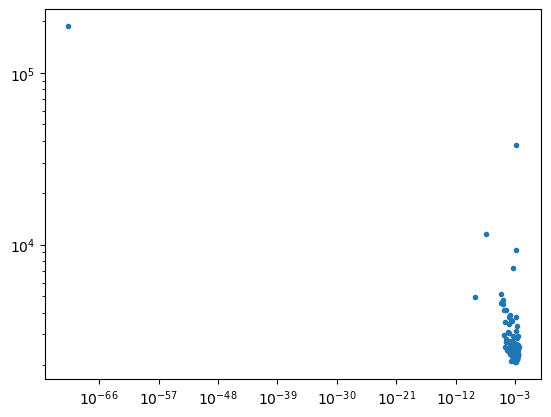

In [28]:
plot(test_training_density, test_single_chisq, '.')
xscale('log');yscale('log')

(1e-12, 0.01)

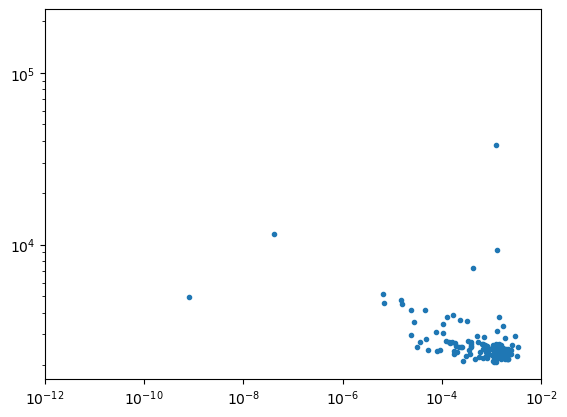

In [30]:
# at what point does the model not fit the data?
# sometimes at high density
# and otherwise 1e-7 is a fine threshold.
plot(test_training_density, test_single_chisq, '.')
xscale('log');yscale('log')
xlim(1e-12,1e-2)

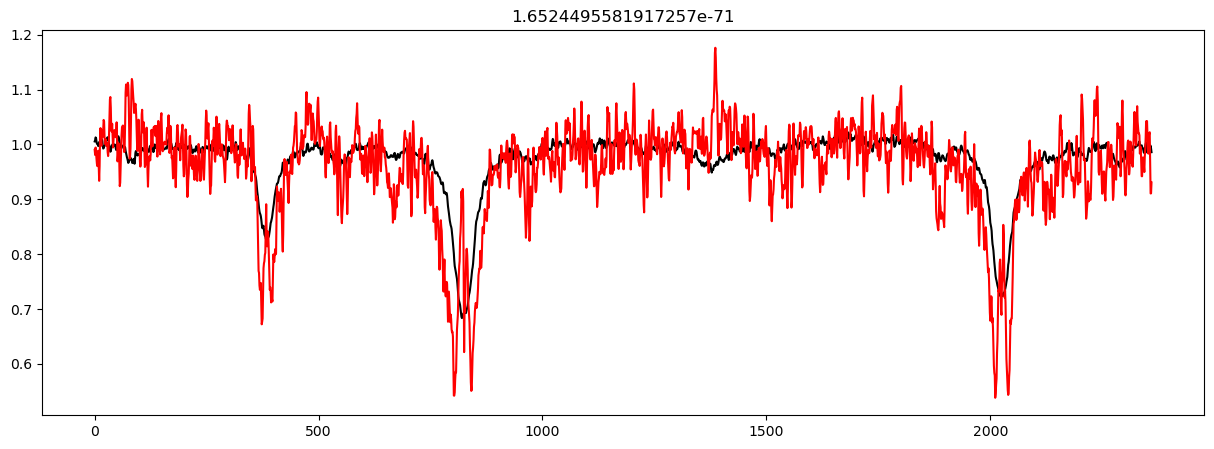

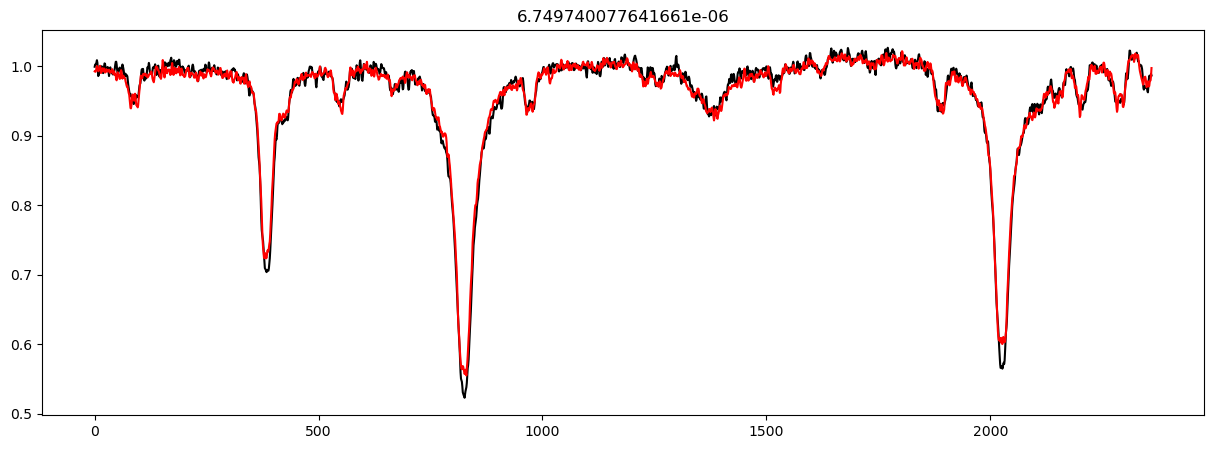

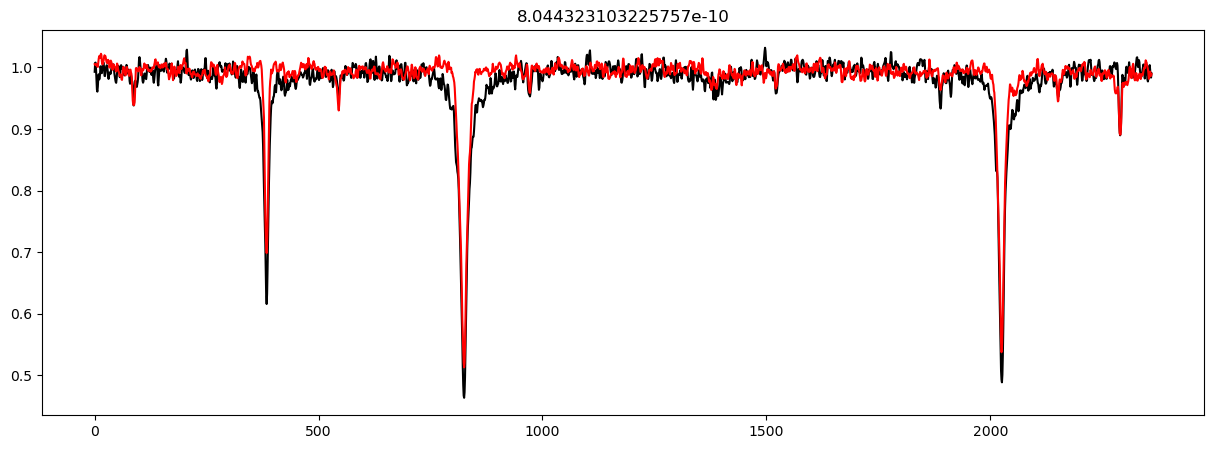

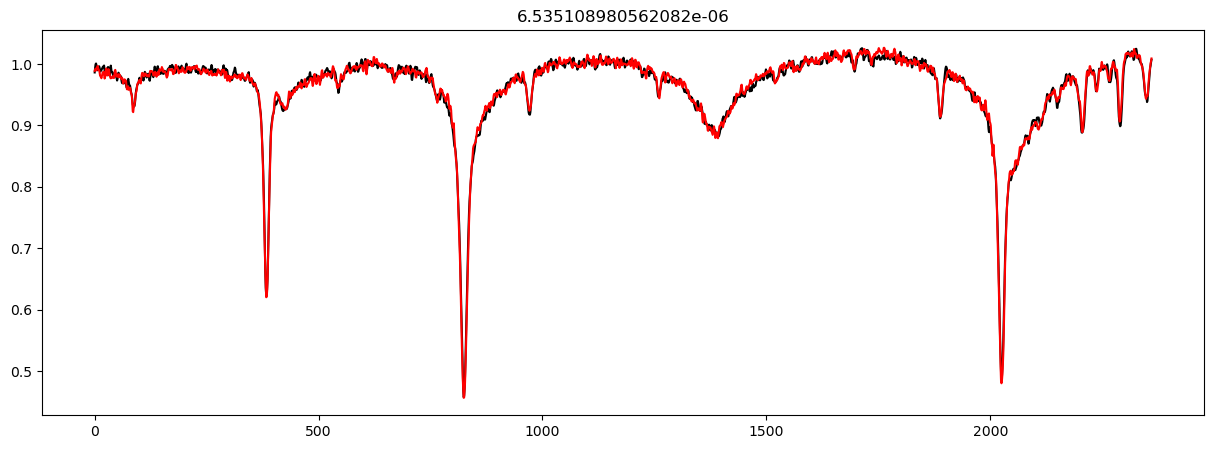

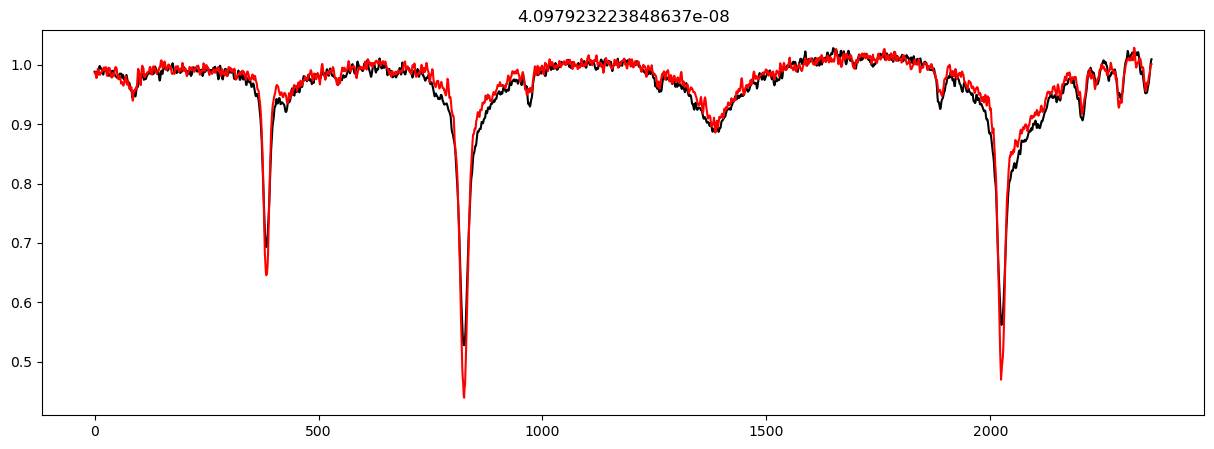

In [32]:
# at what point do the fits visibly not look okay?
# these also justify the training density=1e-7 cutoff.
for i in range(len(test_labels)):
    # compute "true" model from ground truth parameters
    row = test_labels.iloc[i]
    row_labels = row[spectrum.training_labels].values.tolist()
    row_density = spectrum.training_density(row_labels)
    row_cannon_model = spectrum.single_star_model(row_labels)
    
    # compute chisq of true model
    flux = test_flux[str(row.source_id)]
    sigma = test_sigma[str(row.source_id)].copy()
    
    if row_density<1e-5:
        figure(figsize=(15,5))
        title(row_density)
        plot(flux, 'k-')
        plot(row_cannon_model, 'r-')

In [ ]:
# note: couldn't I also just color code the one-to-one plots?